# Informative Dashboard - Exoplanets

### **Group Members**
* Elena Ilic
* Tien Ly

# Background

In [ ]:
import pandas as pd
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import panel as pn
import panel.widgets as pnw

import math

pn.extension('plotly', 'tabulator')

1. `pl_name`: planet name
2. `hostname`: host name
3. `sy_snum`: number of stars in the planetary system
4. `sy_pnum`: number of planets in the planetary system
5. `discoverymethod`: method by which the planet was first identified
6. `disc_year`: year the planet was discovered
7. `pl_orbper`: orbital period of the planet in days (time to make a complete orbit around the host star)
8. `pl_orbeccen`: eccentricity of the orbit (how circular the orbit is)
9. `pl_eqt`: equilibrium temperature of the planet in Kelvin (K)
10. `st_spectype`: spectral type of the system's star following Morgan Keenan system
11. `st_teff`: effective temperature of the star in Kelvin (K)
12. `st_rad`: radius of the star (measure in units of radius of the Sun)
13. `st_mass`: mass of the star (measured in masses of the Sun)
14. `st_logg`: surface gravity of the star (log10(cm/s**2))
15. `sy_dist`: distance to the planetary system in units of parsecs

In [ ]:
exoplanet_zero = 'https://lh3.googleusercontent.com/d/1ZvD6EsKlrMW8Jf9TTbhUgYljWZvGWYI2'

In [ ]:
background = pn.Column('## Background',
                       'This data was extracted from the NASA Exoplanet Archive (link: https://exoplanetarchive.ipac.caltech.edu). \
                       \n\n Information was collected using the Planetary Systems table selecting the columns we wished to investigate. \
                       Data was filtered by the default parameter set column (a built-in flag indicating whether an entry was considered default) to prevent multiple entries of the same exoplanet. \
                       \n\n This project explores the attributes of exoplanets and their systems far beyond our own solar system in order to investigate any observable relationships and examine their similarity to the system we are most familiar with. \
                       These are all real exoplanets, and we may choose to research them further if a certain exoplanet from our data shows to be of interest.',
                       pn.pane.PNG(exoplanet_zero, width=1000),
                       '11 Com b, the first entry in our dataset', name = 'Background')

In [ ]:
starting_url = 'https://docs.google.com/spreadsheets/d/1yTqFsC0xNrrJOV4sk37VdSXWVeTgosi58CvTit3iloM/edit?usp=sharing'
new_url = starting_url.replace('edit?usp=sharing', 'export?format=csv')
exoplanet = pd.read_csv(new_url, skiprows=23)
exoplanet.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbeccen,pl_eqt,st_spectype,st_teff,st_rad,st_mass,st_logg,sy_dist
0,11 Com b,11 Com,2,1,Radial Velocity,2007,323.21000,0.238,NaN,G8 III,4874.0,13.76,2.09,2.45,93.1846
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,516.21997,0.080,NaN,NaN,4213.0,29.79,2.78,1.93,125.3210
2,14 And b,14 And,1,1,Radial Velocity,2008,186.76000,0.000,NaN,K0 III,4888.0,11.55,1.78,2.55,75.4392
3,14 Her b,14 Her,1,2,Radial Velocity,2002,1765.03890,0.373,NaN,NaN,NaN,NaN,0.91,NaN,17.9323
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,798.50000,0.680,NaN,NaN,5750.0,1.13,1.08,4.36,21.1397


In [ ]:
data = pn.Row(pn.Column('## Column Keys',
                        "1. pl_name: planet name \
                        \n\n 2. hostname: host name \
                        \n\n 3. sy_snum: number of stars in the planetary system \
                        \n\n 4. sy_pnum: number of planets in the planetary system \
                        \n\n 5. discoverymethod: method by which the planet was first identified \
                        \n\n 6. disc_year: year the planet was discovered \
                        \n\n 7. pl_orbper: orbital period of the planet in days (time to make a complete orbit around the host star) \
                        \n\n 8. pl_orbeccen: eccentricity of the orbit (how circular the orbit is) \
                        \n\n 9. pl_eqt: equilibrium temperature of the planet in Kelvin (K) \
                        \n\n 10. st_spectype: spectral type of the system's star following Morgan Keenan system \
                        \n\n 11. st_teff: effective temperature of the star in Kelvin (K) \
                        \n\n 12. st_rad: radius of the star (measure in units of radius of the Sun) \
                        \n\n 13. st_mass: mass of the star (measured in masses of the Sun) \
                        \n\n 14. st_logg: surface gravity of the star (log10(cm/s**2)) \
                        \n\n 15. sy_dist: distance to the planetary system in units of parsecs"),
              pn.Column('## Dataset', pnw.Tabulator(exoplanet)),
              name = 'Data')

# Questions and Plots

In [ ]:
exoplanet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5539 non-null   object 
 1   hostname         5539 non-null   object 
 2   sy_snum          5539 non-null   int64  
 3   sy_pnum          5539 non-null   int64  
 4   discoverymethod  5539 non-null   object 
 5   disc_year        5539 non-null   int64  
 6   pl_orbper        5291 non-null   float64
 7   pl_orbeccen      2190 non-null   float64
 8   pl_eqt           1250 non-null   float64
 9   st_spectype      1125 non-null   object 
 10  st_teff          4933 non-null   float64
 11  st_rad           4843 non-null   float64
 12  st_mass          4791 non-null   float64
 13  st_logg          4609 non-null   float64
 14  sy_dist          5420 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 649.2+ KB


## Question 1: Hertzsprung-Russell Diagram
Looking at the Hertzsprung-Russell Diagram, we can classify stars into different types: main sequence, white dwarfs, giants, supergiants, and more, based on their luminosity and temperature. How do each star(s) of their system classify, and do they align with the diagram?

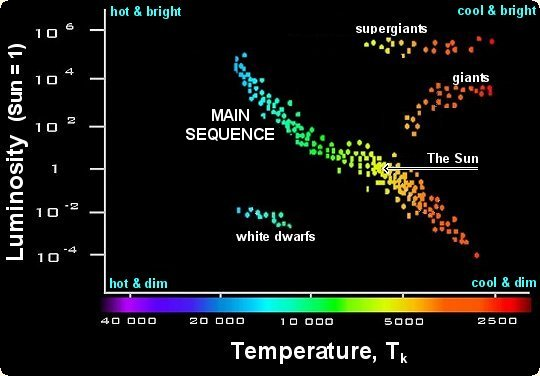

In [ ]:
# plot interactive data to match the hertzsprung-russel diagram (temp vs. luminosity)
# on hover: include planet clasification

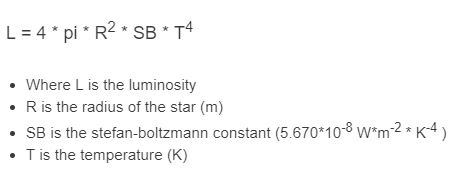

In [ ]:
# calculate luminosity from temp and radius
# sun radii to meter: 1 sun radius = 6.957 x 10E8 meters
sun_rad = 6.957*10**8
sigma = 5.670*10**-8
exoplanet_lum = exoplanet.copy()
exoplanet_lum["st_lum"] = 4 * math.pi * (exoplanet_lum["st_rad"]*sun_rad)**2 * sigma * (exoplanet_lum["st_teff"])**4

In [ ]:
# present luminosity in terms of sun luminosity
sun_lum = 3.846 * 10**26
exoplanet_lum["st_lum"] = exoplanet_lum["st_lum"]/sun_lum

In [ ]:
exoplanet_lum.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbeccen,pl_eqt,st_spectype,st_teff,st_rad,st_mass,st_logg,sy_dist,st_lum
0,11 Com b,11 Com,2,1,Radial Velocity,2007,323.21000,0.238,NaN,G8 III,4874.0,13.76,2.09,2.45,93.1846,95.809068
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,516.21997,0.080,NaN,NaN,4213.0,29.79,2.78,1.93,125.3210,250.688547
2,14 And b,14 And,1,1,Radial Velocity,2008,186.76000,0.000,NaN,K0 III,4888.0,11.55,1.78,2.55,75.4392,68.283600
3,14 Her b,14 Her,1,2,Radial Velocity,2002,1765.03890,0.373,NaN,NaN,NaN,NaN,0.91,NaN,17.9323,NaN
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,798.50000,0.680,NaN,NaN,5750.0,1.13,1.08,4.36,21.1397,1.251572


In [ ]:
exoplanet_lum["st_spectype"].unique()

array(['G8 III', nan, 'K0 III', 'K3 III', 'G6 III', 'K7 V', 'G3 IV',
       'M V', 'M5.5/M6', 'M3.5 V', 'M6', 'M8.5', 'M8', 'K1 III',
       'K1.5 III', 'F0 IV', 'K0 IV', 'G5 V', 'G3 III', 'G5 III', 'K2 V',
       'F8 V', 'K0', 'K2 II', 'K5 III', 'K1', 'K3', 'G0', 'K7/M0 V',
       'K3 V', 'K5 V', 'M5.0 V', 'M9-L1', 'M3.5', 'K7', 'M3 V', 'G0 V',
       'K1 V', 'F6 V', 'F9 V', 'G2 V', 'G9 V', 'F8 IV', 'G3 V', 'F9',
       'G5', 'G2', 'G8/9 IV', 'K0 V', 'F3 V', 'G2 IV', 'G0 VI', 'L1.5',
       'M0.5', 'F5 V', 'F5-F8 V', 'G6 V', 'G8 IV/V', 'M7.25', 'M4.0 V',
       'M2.5 V', 'M5.5 V', 'M 4.5V', 'M4 V', 'M3', 'M4.5 V', 'K4.5', 'M1',
       'M0 V', 'M2 V', 'M3.0 V', 'M0.5 V', 'M0', 'M0.0', 'M2.5', 'M4',
       'M1.0 V', 'M2.0 V', 'M4.0', 'M3.5 Ve', 'M0.5-1.0 V', 'M1 V', 'M2',
       'M1.0', 'M1.5 V', 'M2/3 V', 'F2', 'K7e V', 'K4', 'F8', 'K2', 'G3',
       'K', 'G V', 'K V', 'G', 'F', 'B9 Vne', 'G8 V', 'G9 III', 'K4/5 V',
       'G4 V', 'K2 III', 'M1 III', 'K9 V', 'G7 III', 'G4 IV', 'G3 IV/V

In [ ]:
# label as white dwarf, main sequence, etc.
def cat_planet(x):
  spec_lum_class = x.split(" ") # spectype is listed as a spectral class, and luminosity class
  if len(spec_lum_class) == 1: # entries with no luminosity class are unknown
    return "unknown"

  # only take luminosity class
  lum_class = spec_lum_class[1]

  multi_class = lum_class.split("-") # some spec types have multi classifications, just take first
  if len(multi_class) > 1:
    lum_class = multi_class[1]

  # not all classes are in this dataset
  if lum_class == "0" or lum_class == "Ia+":
    return "hypergiant"
  elif lum_class == "I":
    return "supergiant"
  elif lum_class == "II":
    return "bright giant"
  elif lum_class == "III":
    return "regular giant"
  elif lum_class == "IV":
    return "subgiant"
  elif lum_class == "V":
    return "main sequence"
  elif lum_class == "VI":
    return "subdwarf"
  elif lum_class == "VII":
    return "white dwarf"
  else:
    return "unknown"

In [ ]:
exoplanet_spec = exoplanet_lum[exoplanet['st_spectype'].notnull()]
exoplanet_spec["lum_class"] = exoplanet_spec.st_spectype.map(cat_planet)

In [ ]:
exoplanet_spec.lum_class.unique()

array(['regular giant', 'main sequence', 'subgiant', 'unknown',
       'bright giant', 'subdwarf'], dtype=object)

In [ ]:
# some of the points are unknown, let's visualize them with a plot

def filter_data(df,lum_class):
  if lum_class == "none":
    return df
  else:
    return df[df["lum_class"] == lum_class]

# select which luminosity class to look at
lum_filtered = pnw.Select(name='Luminosity Class', options=['regular giant', 'main sequence', 'subgiant',
       'bright giant', 'subdwarf', 'unknown','none'])

# filter df according to filters
filtered_dataframe = pn.bind(filter_data,
                       df = exoplanet_spec,
                       lum_class = lum_filtered)

# create diagram

def hr_diagram(filtered_dataframe):
  diagram = px.scatter(filtered_dataframe, x = "st_teff", y = "st_lum", hover_data =["st_spectype","lum_class"], color ="st_teff", title = "Hertzsprung-Russell Presentation of Exoplanet Data")
  diagram.update_xaxes(autorange="reversed")
  return diagram

hr_diagram = pn.bind(hr_diagram, filtered_dataframe = filtered_dataframe)

# ignore
#hr_image = "https://lh3.googleusercontent.com/d/1oIqpY6MWqGv9E--WAlH5nG2_MfiW1LxH"
#            "## Question 1",
#            "### Looking at the Hertzsprung-Russell Diagram, we can classify stars into different types: main sequence, white dwarfs, giants, supergiants, and more, based on their luminosity and temperature. How do each star(s) of their system classify, and do they align with the diagram?",
#             pn.pane.PNG(hr_image, width=700),

# bind to panel
filters = pn.Row(lum_filtered)
q1=pn.Column(
             pn.Row(hr_diagram,filters),
             name = "Question 1")
q1

Column(name='Question 1')
    [0] Row
        [0] ParamFunction(function, _pane=Plotly, defer_load=False)
        [1] Row
            [0] Select(name='Luminosity Class', options=['regular giant', ...], value='regular giant')

## Question 2: Exploring Exoplanets Similar to Earth
The sun is a class G2 V star. If we used this information to search for an system similar to our own, would we be successful?

In [ ]:
# filter data by class G stars
# look at # stars, # planets, planet temp, planet orbital period, etc. compared to solar system
# judge: habitable?

In [ ]:
# get G type star
def get_g(x):
  return x[0] == "G"

In [ ]:
# get G
exoplanet_g = exoplanet[exoplanet['st_spectype'].notnull()]
exoplanet_g["is_g"] = exoplanet_g.st_spectype.map(get_g)

exoplanet_g = exoplanet_g[exoplanet_g["is_g"] == True]
exoplanet_g

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbeccen,pl_eqt,st_spectype,st_teff,st_rad,st_mass,st_logg,sy_dist,is_g
0,11 Com b,11 Com,2,1,Radial Velocity,2007,323.210,0.238,NaN,G8 III,4874.0,13.76,2.09,2.45,93.18460,True
6,18 Del b,18 Del,2,1,Radial Velocity,2008,982.850,0.024,NaN,G6 III,4980.0,8.80,2.10,2.87,76.22200,True
8,24 Boo b,24 Boo,1,1,Radial Velocity,2018,30.330,0.032,NaN,G3 IV,4816.0,12.19,1.05,2.28,95.98630,True
33,61 Vir b,61 Vir,1,3,Radial Velocity,2009,4.215,0.120,NaN,G5 V,5577.0,0.96,0.94,4.34,8.50332,True
34,61 Vir c,61 Vir,1,3,Radial Velocity,2009,38.021,0.140,NaN,G5 V,5577.0,0.96,0.94,4.34,8.50332,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,gam Psc b,gam Psc,1,1,Radial Velocity,2021,555.100,0.204,NaN,G7 III,4742.0,11.20,0.99,2.33,41.31070,True
5518,ome Ser b,ome Ser,2,1,Radial Velocity,2013,278.590,0.180,NaN,G8 III,4724.0,10.99,1.01,2.37,76.75560,True
5520,omi UMa b,omi UMa,2,1,Radial Velocity,2012,1569.810,0.149,NaN,G4 II-III,5075.0,13.84,2.72,2.58,54.91490,True
5523,psi1 Dra B b,psi1 Dra B,3,1,Radial Velocity,2015,3117.000,0.400,NaN,G0 V,6212.0,NaN,1.19,4.20,22.71880,True


In [ ]:
# let's find the Earth references
earth_orbper = 365
earth_orbeccen = 0.01671
earth_eqt = 255
solar_planets = 8
solar_suns = 1

In [ ]:
# selection of criteria
x_axis = pnw.Select(name ='x-axis', options = ["pl_orbper",
                                               "pl_orbeccen",
                                               "pl_eqt",
                                               "sy_pnum",
                                               "sy_snum"])

y_axis = pnw.Select(name ='y-axis', options = ["pl_orbper",
                                               "pl_orbeccen",
                                               "pl_eqt",
                                               "sy_pnum",
                                               "sy_snum"])
# getting corresponding earth values
def corresponding_earth(label):
  if label == "pl_orbper":
    return earth_orbper
  elif label == "pl_orbeccen":
    return earth_orbeccen
  elif label == "pl_eqt":
    return earth_eqt
  elif label == "sy_pnum":
    return solar_planets
  else:
    return solar_suns

# create plot with dashed lines showing values for Earth
def planet_plot(x_axis, y_axis):
  planet_diagram = px.scatter(exoplanet_g, x = x_axis, y = y_axis, hover_data =["pl_name", "hostname", "sy_dist"], title = "Comparing G-type Exoplanets to Earth")
  planet_diagram.add_vline(x=corresponding_earth(x_axis), line_dash="dash", line_color = "red", opacity=0.25)
  planet_diagram.add_hline(y=corresponding_earth(y_axis), line_dash="dash", line_color = "red", annotation_text="Earth", opacity=0.25,)
  return planet_diagram

# bind to panel
planet_compare = pn.bind(planet_plot, x_axis = x_axis, y_axis = y_axis)

options = pn.Column(x_axis, y_axis)

q2 = pn.Column(pn.Row(planet_compare, options), name = "Question 2")
q2

Column(name='Question 2')
    [0] Row
        [0] ParamFunction(function, _pane=Plotly, defer_load=False)
        [1] Column
            [0] Select(name='x-axis', options=['pl_orbper', ...], value='pl_orbper')
            [1] Select(name='y-axis', options=['pl_orbper', ...], value='pl_orbper')

## Question 3: Correlation between Orbital Characteristics  and Temperature
* Question: Is there a consistent relationship between the orbital characteristics (orbital period and eccentricity) of exoplanets and their equilibrium temperatures, akin to the patterns observed in our solar system (e.g., Mercury with short orbital period, low eccentricity, and high temperature, and Pluto with long orbital period, high eccentricity, and low temperature)?
* Plot: Scatter plot with `pl_orbper` on the x-axis and `pl_orbeccen` on the y-axis. Use color to represent`pl_eqt`. Hover over points to see details about specific planets (e.g., planet name)



In [ ]:
exoplanet.pl_orbper.describe()

count    5.291000e+03
mean     8.082277e+04
std      5.529168e+06
min      9.070629e-02
25%      4.457790e+00
50%      1.155103e+01
75%      4.128746e+01
max      4.020000e+08
Name: pl_orbper, dtype: float64

In [ ]:
exoplanet.pl_orbeccen.describe()

count    2190.000000
mean        0.156293
std         0.184899
min         0.000000
25%         0.014375
50%         0.091500
75%         0.223750
max         0.950000
Name: pl_orbeccen, dtype: float64

In [ ]:
def q3_plot(df, xaxes_range, yaxes_range):
  fig = px.scatter(df, x='pl_orbper', y='pl_orbeccen',
                   color='pl_eqt', hover_data='pl_name',
                   labels={'pl_eqt': 'Temperature (K)'})

  fig.update_xaxes(range=[df.pl_orbper.quantile(xaxes_range[0]),
                          df.pl_orbper.quantile(xaxes_range[1])])
  fig.update_yaxes(range=[df.pl_orbeccen.quantile(yaxes_range[0]),
                          df.pl_orbeccen.quantile(yaxes_range[1])])

  fig.update_layout(title=dict(text='Orbital Characteristics and Temperature', font=dict(size=20)),
                    xaxis_title='Orbital Period (Days)',
                    yaxis_title='Eccentricity')

  return fig

period_range_slider = pnw.RangeSlider(name='Orbital Period Range Slider (Quantile)', start=0, end=1, value=(0, 0.9), step=0.01)
eccentricity_range_slider = pnw.RangeSlider(name='Eccentricity Range Slider (Quantile)', start=0, end=1, value=(0, 0.9), step=0.01)

title = pn.pane.Str('''### Question: Is there a consistent relationship between the orbital characteristics (orbital period and eccentricity) of exoplanets \
and their equilibrium temperatures, akin to the patterns observed in our solar system \
(e.g., Mercury with short orbital period, low eccentricity, and high temperature, \
and Pluto with long orbital period, high eccentricity, and low temperature)?''')

q3 = pn.Row(pn.bind(q3_plot, df=exoplanet, xaxes_range=period_range_slider, yaxes_range=eccentricity_range_slider),
            pn.Column(period_range_slider, eccentricity_range_slider),
            name='Question 3')

q3

Row(name='Question 3')
    [0] ParamFunction(function, _pane=Plotly, defer_load=False)
    [1] Column
        [0] RangeSlider(name='Orbital Period R..., step=0.01, value=(0, 0.9), value_end=0.9)
        [1] RangeSlider(name='Eccentricity R..., step=0.01, value=(0, 0.9), value_end=0.9)

## Question 4: Discoveries Over Time
* Question: How has the number of exoplanet discoveries changed over the years?
* Interactive plot: Histogram with `disc_year` on the x-axis and the count of discoveries on the y-axis. Allow users to select discovery methods

In [ ]:
exoplanet.discoverymethod.nunique()

11

In [ ]:
exoplanet.discoverymethod.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Disk Kinematics', 'Microlensing',
       'Orbital Brightness Modulation', 'Pulsation Timing Variations',
       'Transit Timing Variations', 'Pulsar Timing'], dtype=object)

In [ ]:
year = list(exoplanet.disc_year.unique())
year.sort()

In [ ]:
def q4_plot(df, method):
  df_method = df[df.discoverymethod == method]

  fig = px.histogram(df_method, x='disc_year',
                     category_orders=dict(disc_year=year))
  fig.update_xaxes(type='category')
  fig.update_layout(title=dict(text=f'Exoplanet Discoveries over Time (Discovery Method: {method})', font=dict(size=20)),
                    xaxis_title='Discovery Year',
                    yaxis_title='Count of Discoveries')
  return fig

method_select_widget = pnw.Select(name='Discovery Method', options=list(exoplanet.discoverymethod.unique()))

q4 = pn.Row(pn.bind(q4_plot, df=exoplanet, method=method_select_widget),
            method_select_widget,
            name='Question 4')
q4

Row(name='Question 4')
    [0] ParamFunction(function, _pane=Plotly, defer_load=False)
    [1] Select(name='Discovery Method', options=['Radial Velocity', ...], value='Radial Velocity')

## Question 5: Effect of Stellar Mass on Planetary Systems
* Question: How does the number of planets in the planetary system relate to the mass of the host star?
* Plot: Violin plot with `sy_pnum` on the x-axis and `st_mass` on the y-axis. Give users the option of whether to display the box plot inside the violin

In [ ]:
exoplanet.hostname.value_counts()

hostname
KOI-351        8
TRAPPIST-1     7
Kepler-11      6
Kepler-20      6
HD 10180       6
              ..
Kepler-1100    1
Kepler-1101    1
Kepler-1102    1
Kepler-1103    1
xi Aql         1
Name: count, Length: 4128, dtype: int64

In [ ]:
# create a new dataframe to store information about each planetary system
system = []
pnum = []
mass = []

for host in exoplanet.hostname.unique():
  system.append(host)
  pnum.append(exoplanet[exoplanet.hostname == host].sy_pnum.values[0])
  mass.append(exoplanet[exoplanet.hostname == host].st_mass.values[0])

df_system = pd.DataFrame({'hostname': system,
                          'sy_pnum': pnum,
                          'st_mass': mass})

In [ ]:
df_system.head()

In [ ]:
df_system.info()

In [ ]:
df_system.describe()

In [ ]:
def q5_plot(df, show_boxplot):
  fig = px.violin(df, x='sy_pnum', y='st_mass',
                  box=show_boxplot, points='all', hover_data='hostname')
  fig.update_layout(title=dict(text='Effect of Stellar Mass on Planetary Systems', font=dict(size=20)),
                    xaxis_title='Number of Planets in the System',
                    yaxis_title='Stellar Mass')
  return fig

boxplot_switch_widget = pnw.Switch(name='Show Box Plot inside the Violin?', value=True)

q5 = pn.Column('Question: How does the number of planets in the planetary system relate to the mass of the host star?',
               pn.Row(pn.bind(q5_plot, df=df_system, show_boxplot=boxplot_switch_widget),
                      pn.Column('Show Box Plot inside the Violin?', boxplot_switch_widget)),
               name='Question 5')
q5

# Interactive Dashboard

In [ ]:
def save_dashboard(event, column):
  column.save(filename='exoplanet.html' , title='Exoplanet Exploration')

In [ ]:
dashboard = pn.Row(pn.Column('# Exoplanet Exploration: Planets Beyond our Solar System', pn.Tabs(background, data, q1, q2, q3, q4, q5)))

save_button = pnw.Button(name='Save as .html', button_type='primary')
save_function = pn.bind(save_dashboard, column=dashboard[0])
save_button.on_click(save_function)
dashboard.append(save_button)

dashboard